In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import joblib
import shap


df = pd.read_csv("entrada.csv")

col_names = ['Refrigerator',
 'Clothes washer',
 'Clothes Iron',
 'Computer',
 'Oven',
 'Play',
 'TV',
 'Sound system']


df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Dia'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df['Minuto'] = df['Fecha'].dt.minute

del df['Unnamed: 0']
#del df['Fecha']

columnas = df.columns.tolist()
ultimas_tres_columnas = columnas[-3:]
print(columnas[0])
nuevas_columnas = [columnas[0]] + ultimas_tres_columnas + columnas[1:-3]
df = df[nuevas_columnas]

df.columns = df.columns.str.replace(' ', '')
df = df.rename(columns={'Medidor[W]': 'Medidor'})


X = df.iloc[:,1:]

modc0 = joblib.load('modelo_clasificacion_d0.pkl')
modc1 = joblib.load('modelo_clasificacion_d1.pkl')
modc2 = joblib.load('modelo_clasificacion_d2.pkl')
modc3 = joblib.load('modelo_clasificacion_d3.pkl')
modc4 = joblib.load('modelo_clasificacion_d4.pkl')
modc5 = joblib.load('modelo_clasificacion_d5.pkl')
modc6 = joblib.load('modelo_clasificacion_d6.pkl')
modc7 = joblib.load('modelo_clasificacion_d7.pkl')


modr0 = joblib.load('modelo_regDTN_d0.pkl')
modr1 = joblib.load('modelo_regDTN_d1.pkl')
modr2 = joblib.load('modelo_regDTN_d2.pkl')
modr3 = joblib.load('modelo_regDTN_d3.pkl')
modr4 = joblib.load('modelo_regDTN_d4.pkl')
modr5 = joblib.load('modelo_regDTN_d5.pkl')
modr6 = joblib.load('modelo_regDTN_d6.pkl')
modr7 = joblib.load('modelo_regDTN_d7.pkl')


modelosC = {
    "modc0" : modc0,
    "modc1" : modc1,
    "modc2" : modc2,
    "modc3" : modc3,
    "modc4" : modc4,
    "modc5" : modc5,
    "modc6" : modc6,
    "modc7" : modc7,
}

modelosR = {
    "modc0" : modr0,
    "modc1" : modr1,
    "modc2" : modr2,
    "modc3" : modr3,
    "modc4" : modr4,
    "modc5" : modr5,
    "modc6" : modr6,
    "modc7" : modr7,
}

df = df.rename(columns={'Medidor': 'Medidor [W]'})

dfResultR = df.copy()
dfResultC = df.copy()

def prediccionesC(X):
    for i in range(8):
        y_pred = modelosC[f"modc{i}"].predict(X)
        dfResultC[col_names[i]] = y_pred

def prediccionesR(X):
    for i in range(8):
        y_pred = modelosR[f"modc{i}"].predict(X)
        dfResultR[col_names[i]] = y_pred

prediccionesR(X)
prediccionesC(X)

del dfResultC["Dia"]
del dfResultC["Hora"]
del dfResultC["Minuto"]
del dfResultR["Dia"]
del dfResultR["Hora"]
del dfResultR["Minuto"]

dfResultC.to_csv('salida_clasificacion.csv', index=False)
dfResultR.to_csv('salida_regresion.csv', index=False)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Fecha


In [2]:
dfResultR

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
0,2017-06-07 00:00:00,228.887,141.500000,0.476190,0.377953,0.300000,0.277778,0.306818,0.028571,1.042857
1,2017-06-07 00:01:00,231.814,141.500000,0.476190,0.377953,0.300000,0.285714,0.306818,0.028571,1.042857
2,2017-06-07 00:02:00,230.971,141.500000,0.476190,0.377953,0.300000,0.044444,0.306818,0.028571,1.042857
3,2017-06-07 00:03:00,231.878,141.500000,0.476190,0.377953,0.120000,0.044444,0.306818,0.028571,1.042857
4,2017-06-07 00:04:00,189.225,0.040000,0.635484,0.474630,0.000000,0.471429,0.245614,0.314286,0.275758
...,...,...,...,...,...,...,...,...,...,...
194118,2017-10-22 23:55:00,88.272,0.606122,0.546154,0.412922,0.066667,0.487500,0.485593,0.092308,4.200000
194119,2017-10-22 23:56:00,86.386,0.519266,0.891176,0.466667,0.350000,0.440000,0.485593,0.522222,0.554545
194120,2017-10-22 23:57:00,85.766,0.050000,0.891176,0.466667,0.350000,0.216667,0.485593,0.300000,0.554545
194121,2017-10-22 23:58:00,87.665,0.519266,0.432432,0.412922,0.433333,0.300000,0.485593,0.575000,4.200000


In [3]:
df = pd.read_csv("consumo_casa.csv")


df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Dia'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df['Minuto'] = df['Fecha'].dt.minute

del df['Unnamed: 0']
del df['Fecha']

columnas = df.columns.tolist()
ultimas_tres_columnas = columnas[-3:]
nuevas_columnas = ultimas_tres_columnas + columnas[:-3]
df = df[nuevas_columnas]

df.columns = df.columns.str.replace(' ', '')
df = df.rename(columns={'Medidor[W]': 'Medidor'})
df1 = df.iloc[:, :4] # Selecciona las dos primeras columnas
df2 = df.iloc[:, 4:] # Selecciona las columnas desde la tercera en adelante

In [4]:
df1

,Dia,Hora,Minuto,Medidor
0,7,0,0,228.887
1,7,0,1,231.814
2,7,0,2,230.971
3,7,0,3,231.878
4,7,0,4,189.225
...,...,...,...,...
194118,22,23,55,88.272
194119,22,23,56,86.386
194120,22,23,57,85.766
194121,22,23,58,87.665


In [10]:
X = df1
y = df2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.03,random_state=0)

In [11]:
X_test

,Dia,Hora,Minuto,Medidor
46664,9,22,34,1183.690
175651,9,9,11,49.279
15219,17,14,13,63.062
101895,18,18,3,48.109
53191,14,11,28,349.280
...,...,...,...,...
103242,19,16,30,55.327
151762,22,17,54,252.211
82362,4,17,4,180.180
138191,13,6,50,1121.250


In [19]:
explainer = shap.Explainer(modc1)

In [20]:
shap_values = explainer.shap_values(X_test)

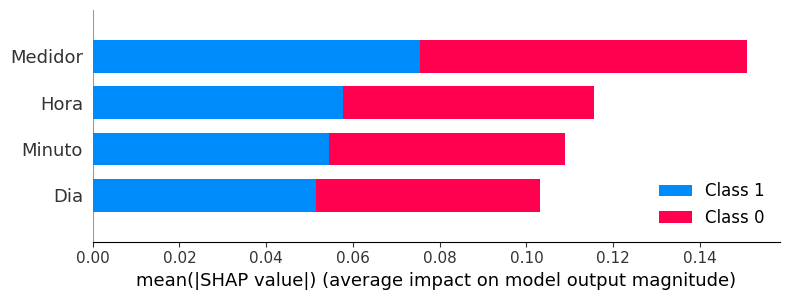

In [21]:
shap.summary_plot(shap_values, X_test)

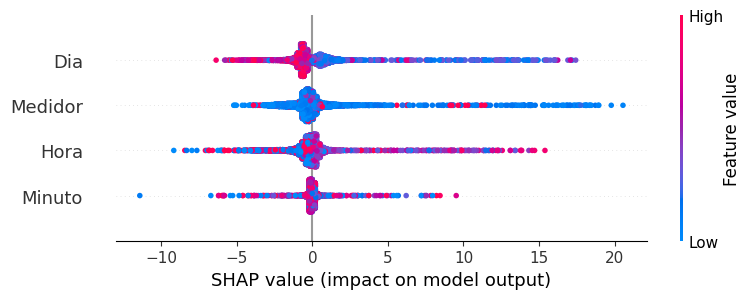

In [25]:
explainerR = shap.Explainer(modr3)
shap_valuesR = explainerR.shap_values(X_test)
shap.summary_plot(shap_valuesR, X_test)

In [2]:
dfResultR.describe()

,Fecha,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
count,194123,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000,194123.000000
mean,2017-08-14 20:16:17.031057920,284.337465,57.499957,4.204369,4.530379,1.332430,5.739773,0.946187,9.966616,3.563182
min,2017-06-07 00:00:00,30.658000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-07-11 05:42:30,89.915000,0.550000,0.615385,0.305263,0.080000,0.157143,0.298780,0.138462,1.987500
50%,2017-08-15 09:24:00,175.799000,0.800000,0.772515,0.375404,0.320000,0.380000,0.418932,0.384615,4.488889
75%,2017-09-18 10:48:30,242.910000,130.177778,0.962963,0.423606,0.733333,0.660000,0.736364,0.785714,5.007692
max,2017-10-22 23:59:00,1992.216000,791.000000,286.145000,1090.687500,54.900000,1636.160000,19.450000,229.885714,15.683333
std,NaN,355.066930,68.800657,19.983863,56.485050,5.568517,82.643340,1.254517,21.320905,1.864595


In [6]:
dfResultR_ensayos = dfResultR.copy()
del dfResultR_ensayos['Fecha']
del dfResultR_ensayos['Medidor [W]']
dfResultR_ensayos

,Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
0,141.500000,0.476190,0.377953,0.300000,0.277778,0.306818,0.028571,1.042857
1,141.500000,0.476190,0.377953,0.300000,0.285714,0.306818,0.028571,1.042857
2,141.500000,0.476190,0.377953,0.300000,0.044444,0.306818,0.028571,1.042857
3,141.500000,0.476190,0.377953,0.120000,0.044444,0.306818,0.028571,1.042857
4,0.040000,0.635484,0.474630,0.000000,0.471429,0.245614,0.314286,0.275758
...,...,...,...,...,...,...,...,...
194118,0.606122,0.546154,0.412922,0.066667,0.487500,0.485593,0.092308,4.200000
194119,0.519266,0.891176,0.466667,0.350000,0.440000,0.485593,0.522222,0.554545
194120,0.050000,0.891176,0.466667,0.350000,0.216667,0.485593,0.300000,0.554545
194121,0.519266,0.432432,0.412922,0.433333,0.300000,0.485593,0.575000,4.200000


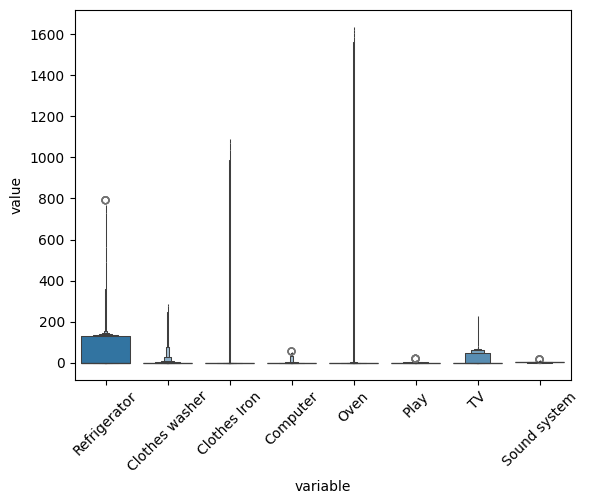

In [7]:
df_melted = pd.melt(dfResultR_ensayos)
sns.boxenplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=45)
plt.show()